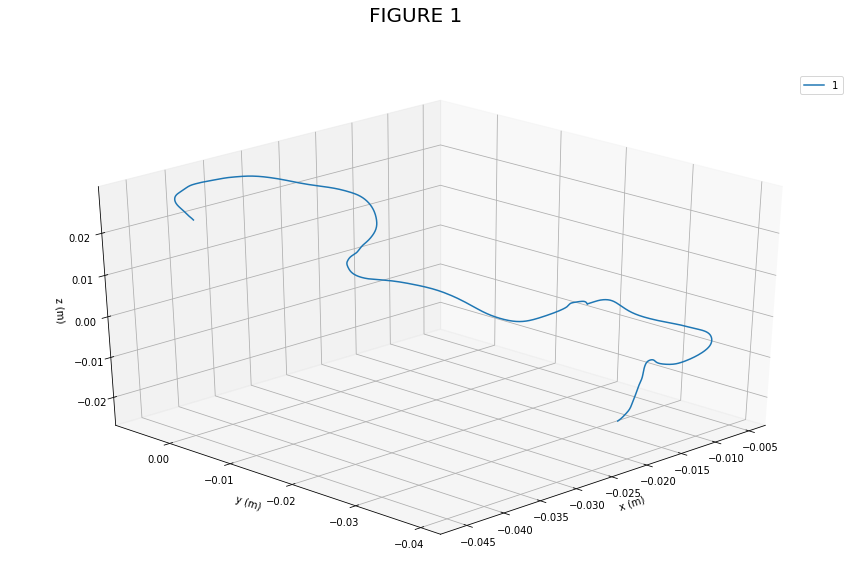

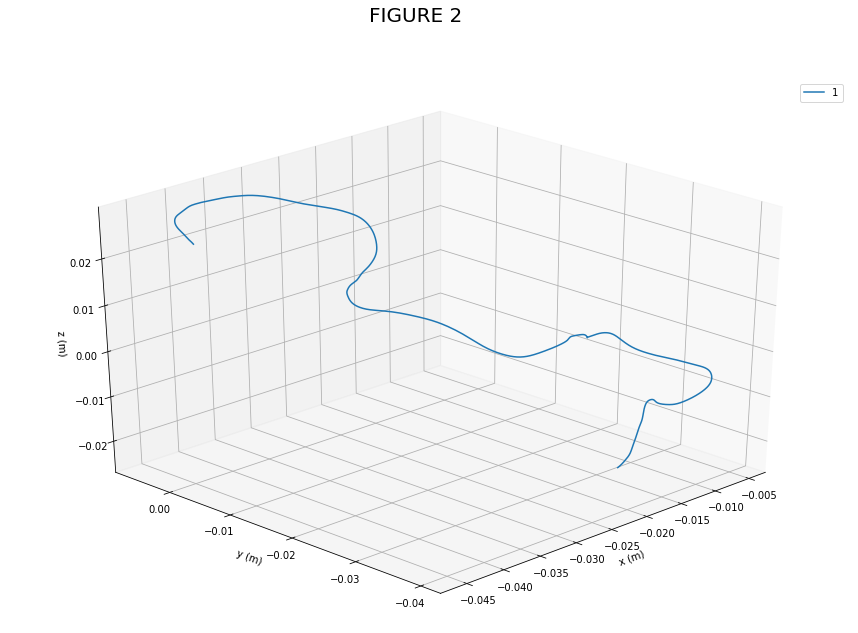

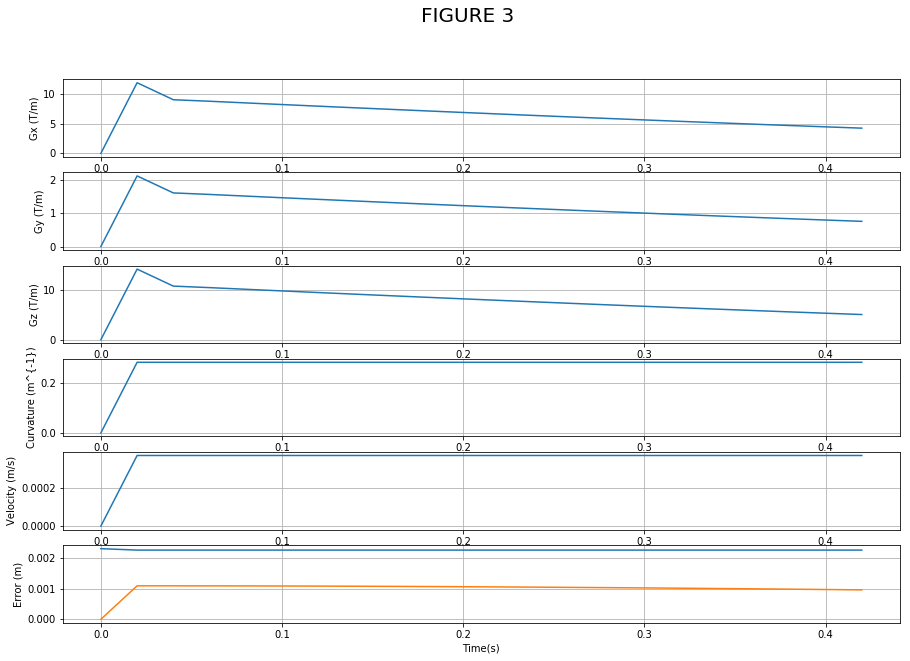

In [1]:
import pandas as pd
import pylab as P
import os,sys,csv
from decimal import *
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
pi=3.14
from tkinter import *


class Values(Tk):
    """docstring for Values"""
    def __init__(self, parent):
        Tk.__init__(self,parent)
        self.parent = parent
        self.initialize()

    def initialize(self):
        self.grid()
        stepOne = LabelFrame(self, text=" 1. PROJECT 2 ")
        stepOne.grid(row=0, columnspan=7, sticky='W',padx=5, pady=5, ipadx=5, ipady=5)
        
        self.Val1Lbl = Label(stepOne,text="Sphere_Radius Rs")
        self.Val1Lbl.grid(row=0, column=0, sticky='E', padx=5, pady=2)
        self.Val1Txt = Entry(stepOne)
        self.Val1Txt.grid(row=0, column=1, columnspan=3, pady=2, sticky='WE')
        
        self.Val2Lbl = Label(stepOne,text="Sphere magnetization Ms")
        self.Val2Lbl.grid(row=1, column=0, sticky='E', padx=5, pady=2)
        self.Val2Txt = Entry(stepOne)
        self.Val2Txt.grid(row=1, column=1, columnspan=3, pady=2, sticky='WE')
        
        self.Val3Lbl = Label(stepOne,text="controller parameters Kp")
        self.Val3Lbl.grid(row=2, column=0, sticky='E', padx=5, pady=2)
        self.Val3Txt = Entry(stepOne)
        self.Val3Txt.grid(row=2, column=1, columnspan=3, pady=2, sticky='WE')
        
        
        self.Val4Lbl = Label(stepOne,text="controller parameters Ki")
        self.Val4Lbl.grid(row=3, column=0, sticky='E', padx=5, pady=2)
        self.Val4Txt = Entry(stepOne)
        self.Val4Txt.grid(row=3, column=1, columnspan=3, pady=2, sticky='WE')
        
        self.Val5Lbl = Label(stepOne,text="controller parameters Kd")
        self.Val5Lbl.grid(row=4, column=0, sticky='E', padx=5, pady=2)
        self.Val5Txt = Entry(stepOne)
        self.Val5Txt.grid(row=4, column=1, columnspan=3, pady=2, sticky='WE')
        '''
        self.Val6Lbl = Label(stepOne,text="Velocity_file name")
        self.Val6Lbl.grid(row=5, column=0, sticky='E', padx=5, pady=2)
        self.Val6Txt = Entry(stepOne)
        self.Val6Txt.grid(row=5, column=1, columnspan=3, pady=2, sticky='WE')
        
'''
        

        self.val1 = None
        self.val2 = None
        self.val3 = None
        self.val4 = None
        self.val5 = None
        #self.val6 = None

        SubmitBtn =Button(stepOne, text="Submit",command=self.submit)
        SubmitBtn.grid(row=8, column=3, sticky='W', padx=5, pady=2)

    def submit(self):
        self.val1=self.Val1Txt.get()
        if self.val1=="":
            Win2=Tk()
            Win2.withdraw()

        self.val2=self.Val2Txt.get()
        if self.val2=="":
            Win2=Tk()
            Win2.withdraw()
            
        self.val3=self.Val3Txt.get()
        if self.val1=="":
            Win2=Tk()
            Win2.withdraw()
        
        self.val4=self.Val4Txt.get()
        if self.val1=="":
            Win2=Tk()
            Win2.withdraw()
        
        self.val5=self.Val5Txt.get()
        if self.val1=="":
            Win2=Tk()
            Win2.withdraw()
        
        '''
        self.val6=self.Val6Txt.get()
        if self.val1=="":
            Win2=Tk()
            Win2.withdraw()
        '''
        self.quit()


#FUNCTION DEFINITIONS
def root(x):
    last_guess= x/2.0
    while True:
        guess= (last_guess + x/last_guess)/2
        if abs(guess - last_guess) < 0.00000000000000000000000000000000000000000000000000000000000001: # example threshold
            return guess
        last_guess= guess
    
def power(a,b):
    result = 1
    for _ in range(b):   # using _ to indicate throwaway iteration variable
        result *= a
    return result

hh=pd.DataFrame(columns=[0,1,2])
hh.loc[0]=0
def interp(X1,Y,xi):
    
    type(Y)
    X = [float(x) for x in X1]
    X.sort(key=float)
    l= len(X)
    #print (l)
    #print (Y[0])
    i=0
   # print (X[0])
    for i in range(l):
        #print (X[i],i)
        
        if (X[i]==xi):
            if(i==0):
                return hh.loc[0]
                break
            else:
                l1=i-1
                l2=i+1
                break
        elif (X[i]>xi):
            #print ('in elif loop')
            #print (i)
           
            l1=i-1
            l2=i
            #print(l1)
            #print(l2)
            break
        
        i=i+1        
    
    m=(Y[l2]-Y[l1])/(X[l2]-X[l1])
    yi=Y[l1]+(m*(xi-X[l1]))
    return yi 

def pchip_init(x,y):
    '''
    x = [float(x) for x in X1]
    x.sort(key=float)
    y = [float(x) for x in Y1]
    y.sort(key=float)
    y = [float(x) for x in Y1]
    y.sort(key=float)
    '''
    n = len(x)
    ss=list(np.array(x[1:]) - np.array(x[:-1]))
    ss=np.array(ss)
    yy=(y[1:]) - (y[:-1])
    
    # Compute the slopes of the secant lines between successive points
    i=0
    for i in range(len(ss)):
        delta=yy[i]/ss[i]
   # Initialize the tangents at every points as the average of the secants
    
    m = []
    m =[0] * n
    # At the endpoints - use one-sided differences
    m[0] = delta[0]
    m[n-1] = delta[-1]
      # In the middle - use the average of the secants
    m[1:-1] = (delta[:-1] + delta[1:]) / 2.0
       # Special case: intervals where y[k] == y[k+1]

    # Setting these slopes to zero guarantees the spline connecting
    # these points will be flat which preserves monotonicity
    indices_to_fix = np.compress((delta == 0.0), range(n))
    for ii in indices_to_fix:
        m[ii]   = 0.0
        m[ii+1] = 0.0
    if(delta.all()==0):
        alpha=[]
        beta=[]
        dist=[]
        dist.append(0)
        tau=[]
    else:
        alpha = m[:-1]/delta
        beta  = m[1:]/delta
        dist  = alpha**2 + beta**2
        b=len(dist)
        if(b==1):
            tau   = 3.0 / root(dist[0])
        else:
            tau   = 3.0 / root((power(dist[0],2))+(power(dist[1],2))+(power(dist[2],2)))
        
    #over = list(dist > 9.0) 
    over=[i>9.0 for i in dist]
    indices_to_fix = np.compress(over, range(n))

    for ii in indices_to_fix:
        m[ii]   = tau[ii] * alpha[ii] * delta[ii]
        m[ii+1] = tau[ii] * beta[ii]  * delta[ii]
    
    return m
   
def pchip_eval(x,y, m, xvec):
    '''
    x = [float(x) for x in X1]
    x.sort(key=float)
    y = [float(x) for x in Y1]
    y.sort(key=float)
    '''
    n = len(x)
    mm = 1

  # Find the indices "k" such that x[k] < xvec < x[k+1]

    # Create "copies" of "x" as rows in a mxn 2-dimensional vector
    xx = np.resize(x,n).transpose()
    xx1=xx.tolist()
    #print (type(xx1))
    xxx = [i for i in xx1 if i >xvec]
    #print (xxx)

    # Compute column by column differences
    z = np.array(xxx[:-1])- np.array(xxx[1:])
    #print (z)
    l= len(x)
    for i in range(l):
        
        if (x[i]>xvec):
            #print ('in elif loop')
            #print (i)
           
            k=i-1
            break
    # Collapse over rows...
   # k = z.argmax(axis=0)
    #print ('value')
    #print (k)
    #print('X')
    #print (x)
    # Create the Hermite coefficients
    h = x[k+1] - x[k]
    #print (h)
    t = (xvec - x[k])/h

    # Hermite basis functions
    h00 = (2 * t**3) - (3 * t**2) + 1
    h10 =      t**3  - (2 * t**2) + t
    h01 = (-2* t**3) + (3 * t**2)
    h11 =  t**3  - t**2

    # Compute the interpolated value of "y"
    ynew = h00*y[k] + h10*h*m[k] + h01*y[k+1] + h11*h*m[k+1]

    return ynew

def pchip_interp(x,y,xi,args1,args2):
    m = pchip_init(x, y)
    yi=pchip_eval(x, y, m, xi)
    return yi


if __name__ == '__main__':
    
    app = Values(None)
    app.title('USER VALUES:PROJECT2')
    app.mainloop()
    
    Sphere_radius=float(app.val1)
    Sphere_density=7500
    blood_velocity=0.001; #[m/s] It is assumed to be constant for now but it is actually a function od the artery diameter. Enter a negative value to have the blood flow go against the sphere displacement.
    base_velocity=0.0002; #[m/s] 
    curv0=0.4; #curvature value that will divide the velocity by two
    radii0=0.0015; #safety corridor radius value that will divide the velocity by two
    Kp=float(app.val3)
    Ki=float(app.val4)
    Kd=float(app.val5)
    kr=0.7
    Magnetization_sphere=float(app.val2)
    Cd=0.47; #Drag coefficient of a sphere at Re=10e5. 
    Blood_density=1025; #[Kg/m^3]
    Q=pi*power(Sphere_radius,2); #Reference area for drag calculation
    #Other parameters calculation
    Volume_Sphere=(4/3)*pi*power(Sphere_radius,3); #m^3]
    Mass_sphere=Sphere_density*Volume_Sphere; #Kg]
    Moment_sphere=Magnetization_sphere*Volume_Sphere;
    
    P1=pd.read_csv('FileName.csv', sep=',',header=None)
    P1=P1*0.001
    radii_=pd.read_csv('FileName2.csv', sep=',',header=None)
    radii_=radii_*0.001
    curv1_=pd.read_csv('FileName3.csv', sep=',',header=None)
    
    curv1_.index = np.arange(1,len(curv1_)+1)
    curv2=pd.DataFrame()
    curv2.loc[0,0]=0.282150
    frames=[curv2,curv1_]
    curv_ = pd.concat(frames)
    curv_.loc[1738,0]=0.01772
    dP_=pd.DataFrame(columns=['x','y','z'])
    path_distance=[]
    path_distance=[0]*1
    k=0
    distance=[]
    a=[]
    b=[]
    c=[]
    i=0
    for i in range(1738):
        a.append(P1.loc[i+1,0]-P1.loc[i,0])
        b.append(P1.loc[i+1,1]-P1.loc[i,1])
        c.append(P1.loc[i+1,2]-P1.loc[i,2])
        
    
    dP_['x']=a
    dP_['y']=b
    dP_['z']=c
    
    dP_.columns = range(dP_.shape[1])
    
    P=P1.as_matrix()
    radii=radii_.as_matrix()
    curv=curv_.as_matrix()
    dP=dP_.as_matrix()
    #DELETING DATAFRAMES TO SAVE MEMORY
    del radii_
    del curv_
    del dP_
    del curv2
    del curv1_
    #PLOTTING FIGURE 1
    mpl.rcParams['legend.fontsize'] = 10
    fig1 = plt.figure()
    ax = fig1.gca(projection='3d')
    fig1.set_size_inches(15,9,forward=True)
    fig1.suptitle('FIGURE 1', fontsize=20)
    ax.plot(P1[0], P1[1], P1[2])
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.legend()
    ax.azim = 225
    plt.show()
    for k in list(range(1738)):
        tempo=root(power(dP[k][0],2)+power(dP[k][1],2)+power(dP[k][2],2))
        distance.append(tempo)
        path_distance.append(path_distance[k]+distance[k])
    V1=pd.DataFrame(columns=['x','y','z'])
    V1.loc[0] = pd.Series({'x':0, 'y':0, 'z':0})
    V1.columns = range(V1.shape[1])
    
    k=0
    for k in range(1738):
        V1.loc[k+1,:]=base_velocity*(1/(1+(curv[k][0]/curv0)))*((radii[k][0]-Sphere_radius)/(radii0-Sphere_radius))
    
    V1.loc[1,:]=V1.loc[2,:]
    m,n=V1.shape
    V=V1.as_matrix()
    del V1
    
    a = np.zeros(shape=(m-1,n))
    V_blood_dir1 = pd.DataFrame(a)
    b = np.zeros(shape=(m-1,1))
    norm_drag1 = pd.DataFrame(b)
    drag=pd.DataFrame(columns=[0,1,2])
    
    k=0
    for k in range(1737):
        V_blood_dir1.loc[k,:]=V[k+1]/root(power(V[k+1][0],2)+power(V[k+1][1],2)+power(V[k+1][2],2))
        nn=power((root(power(V[k+1][0],2)+power(V[k+1][1],2)+power(V[k+1][2],2))),2)
        norm_drag1.loc[k,0]=-0.5*Cd*Blood_density*nn*Q*power((nn-blood_velocity),2)
        drag.loc[k,:]=norm_drag1.loc[k,0]*V_blood_dir1.loc[k,:]
        
    
    V_blood_dir=V_blood_dir1.as_matrix()
    del V_blood_dir1
    
    norm_drag=norm_drag1.as_matrix()
    norm_drag1
        
        
    m1=len(P)
    n1=3
    current_G=pd.DataFrame(columns=[0,1,2])
    current_G.loc[0] = pd.Series({0:0, 1:0, 2:0})
    current_pos=pd.DataFrame(columns=[0,1,2])
    current_pos.loc[0]=P[0]
    current_pos
    current_vel1=pd.DataFrame(columns=[0,1,2])
    current_vel1.loc[0] = pd.Series({0:0, 1:0, 2:0})
    current_vel=current_vel1.as_matrix()
    del current_vel1
    delta_t=base_velocity*100
    
    current_time=0#initial time
    PI=0 #initial value of the integral component of the PID regulator
    plot_var=0
    error_vel_pos=0 #error on velocity
    error_pos_history=[]
    error_pos_history.append(0)#error on position
    time_history=[]
    time_history.append(0)
    #time
    safe_radii_history=[]
    safe_radii_history.append(radii[0][0])
    vel_history=[]; #velocity of the sphere
    vel_history.append(0)
    curv_history=[]
    curv_history.append(0)
    
    pos_history=current_pos
    G_history=pd.DataFrame(columns=[0,1,2])
    G_history.loc[0] = pd.Series({0:0, 1:0, 2:0})
    
    ip=0
    plot_var=0
    while ip<=20:
        
        #_________________________________________
        # 1)Get the current positon of the sphere
    
        #the position and velocity of the sphere is already stored in current_pos and
        #current_vel

       
    # 2)Calculate the setpoint of the controller 
    #%Find the closest point on the path
        dist=[]
        d=[]
        d_temp = 0
        i=0
        while (d_temp<path_distance[len(path_distance)-1]):
            yi=interp(path_distance,P,d_temp)
            temporary=current_pos-yi
            ik = root((power(temporary.loc[0,0],2))+(power(temporary.loc[0,1],2))+(power(temporary.loc[0,2],2)))
            dist.append(ik)
            d_temp = d_temp+0.0001
            d.append(d_temp)
            i=i+1  
            temporary.drop(0)

        d_min= 0.0
        index =1 
        Position_on_path=d[0]

        #Find the velocity vector setpoint
        vel_setpoint=interp(path_distance,V,Position_on_path+0.001)
        pos_setpoint=interp(path_distance,P,Position_on_path+0.001)

        #_________________________________________________________________-
        # 3) Calculate the output of the controller
    
        #calculation of the error on the position and velocity
    
    
        old_error=error_vel_pos
        temporary2=current_pos-pos_setpoint
        error_pos=root(power(temporary2.loc[0,0],2)+power(temporary2.loc[0,1],2)+power(temporary2.loc[0,2],2))
        error_vel_pos=(current_vel-vel_setpoint)+(kr*(current_pos-pos_setpoint))
        d_error_over_dt=(error_vel_pos-old_error)/delta_t
        
        
        #P component
        PF=-Kp*error_vel_pos;
         #I component
        PI=PI-error_vel_pos*delta_t*Ki;
        #D component
        PD=-Kd*d_error_over_dt;
    
        #4) add the optimum control
        #optimum control (drag)
        FF=0.5*Cd*Blood_density*(root(power(vel_setpoint[0],2)+power(vel_setpoint[1],2)+power(vel_setpoint[2],2)))*Q*vel_setpoint 
        #no - sign because the force must be applied in the velocity direction
        current_G=(1/Moment_sphere)*(PF+PI+FF+PD)
    
    
        #_________________________________________________________________________
        #5) This part simulates the movements of the sphere and calculate its position
        #and velocity on the next time step
    
        
        current_pos=current_pos+current_vel*delta_t
        yy1=pchip_interp(path_distance[1:len(path_distance)],V_blood_dir,Position_on_path,'PCHIP','extrap')
        yy2=pchip_interp(path_distance[1:len(path_distance)],norm_drag,Position_on_path,'PCHIP','extrap')
        blood_flow_drag=yy1*yy2
        #t1= root(power(current_vel[0][0],2)+power(current_vel[0][1],2)+power(current_vel[0][2],2))
        t1=0
        current_drag=0.5*Cd*Blood_density*t1*Q*current_vel+blood_flow_drag
        current_a=current_G*Moment_sphere+current_drag #acceleration of the sphere
        current_vel=current_vel+current_a*delta_t #velocity of the sphere
        #_____________________________________________________________________
        #store results
    
        safe_radii=pchip_interp(path_distance,radii,Position_on_path,'PCHIP','extrap')
        pos_history=pos_history.append(current_pos,ignore_index=True)
        safe_radii_history.append(safe_radii[0])
        G_history=G_history.append(current_G,ignore_index=True)
        
        val1=time_history[(len(time_history))-1]+delta_t
        time_history.append(val1)
        error_pos_history.append(error_pos)
        vel_history.append(root(power(vel_setpoint[0],2)+power(vel_setpoint[1],2)+power(vel_setpoint[2],2)))
        yim=pchip_interp(path_distance,curv,Position_on_path,'PCHIP','extrap')
        curv_history.append(yim)
    
    #PLOTTING
        if plot_var==20:
            #figure2
            mpl.rcParams['legend.fontsize'] = 10
            fig2 = plt.figure()
            ax = fig2.gca(projection='3d')
            fig2.set_size_inches(15, 10, forward=True)
            fig2.suptitle('FIGURE 2', fontsize=20)
            ax.plot(P1.loc[:,0], P1.loc[:,1], P1.loc[:,2])
            ax.set_xlabel('x (m)')
            ax.set_ylabel('y (m)')
            ax.set_zlabel('z (m)')
            ax.legend()
            ax.azim = 225
            plt.show()
            #FIGURE 3       
            fig3 = plt.figure()
            fig3.set_size_inches(15, 10, forward=True)
            fig3.suptitle('FIGURE 3', fontsize=20)
    
            plt.subplot(6,1,1)             # the first subplot in the first figure
            plt.plot(time_history,list(G_history.loc[:,0]))
            plt.ylabel('Gx (T/m)')
            plt.grid()
    
            plt.subplot(6,1,2)             # the second subplot in the first figure
            plt.plot(time_history,list(G_history.loc[:,1]))
            plt.ylabel('Gy (T/m)')
            plt.grid()
    
            plt.subplot(6,1,3)             # the fourth subplot in the first figure
            plt.plot(time_history,list(G_history.loc[:,2]))
            plt.ylabel('Gz (T/m)')
            plt.grid()
    
            if Sphere_radius in safe_radii_history:
                safe_radii_history=safe_radii_history.remove(Sphere_radius)
    
            plt.subplot(6,1,6)             # the sixth subplot in the first figure
            plt.plot(time_history,safe_radii_history,time_history,error_pos_history)
            plt.ylabel('Error (m)')
            plt.xlabel('Time(s)')
            plt.grid()
    
    
            plt.subplot(6,1,5)             # the fifth subplot in the first figure
            plt.plot(time_history,vel_history)
            plt.ylabel('Velocity (m/s)')
            plt.grid()
    
    
    
            plt.subplot(6,1,4)
            plt.plot(time_history,curv_history)
            plt.ylabel('Curvature (m^{-1})')
            plt.grid()
            
            plt.show()
        else:
            plot_var=plot_var+1
        
    
    
        ip=ip+1
    G_history.to_csv('project2:gradient_output()')
    G_history.to_csv('project3:gradient_output')
    with open('project2:gradient_output()', 'w') as outcsv:
        writer = csv.writer(outcsv)
        writer.writerow(["j","Grad_X(j)", "Grad_Y(j)", "Grad_Y(j)"])
        for i in range(len(G_history)):
            writer.writerow([i,G_history.loc[i,0],G_history.loc[i,1],G_history.loc[i,2]])
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    df3=pd.DataFrame()
    df1['j']=list(range(1739))
    df2['time']=time_history
    df1['PhTarget_X(j)']=P1.loc[:,0]
    df1['PhTarget_Y(j)']=P1.loc[:,1]
    df1['PhTarget_Z(j)']=P1.loc[:,2]
    df2['PhResp_X(j)'] =pos_history.loc[:,0]
    df2['PhResp_Y(j)'] =pos_history.loc[:,1]
    df2['PhResp_Z(j)'] =pos_history.loc[:,2]
    df2['PhError_X(j)'] =error_pos_history
    df1['VTarget_X(j)'] =V[:,0]
    df1['VTarget_Y(j)'] =V[:,1]
    df1['VTarget_Z(j)'] =V[:,2]
    df3['VResp_X(j)'] =V_blood_dir[:,0]
    df3['VResp_Y(j)'] =V_blood_dir[:,1]
    df3['VResp_Z(j)'] =V_blood_dir[:,2]
    df2['Grad_X(j)'] =G_history.loc[:,0]
    df2['Grad_Y(j)'] =G_history.loc[:,1]
    df2['Grad_Z(j)'] =G_history.loc[:,2]
    df4=pd.concat([df1,df2,df3], axis=1)
    df4.to_csv('software_ouput')

